C:\Users\nodna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


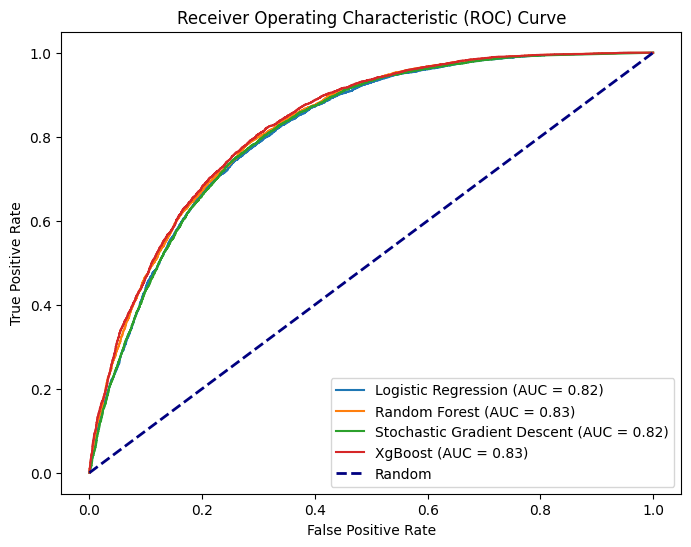

In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
# split data into training and testing 
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns = ['Diabetes_binary']), train['Diabetes_binary']
X_test, y_test = test.drop(columns = ['Diabetes_binary']), test['Diabetes_binary']


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=70, max_depth=13, min_samples_split=30, 
                               min_samples_leaf=10, max_features=5),
    'Stochastic Gradient Descent': SGDClassifier(alpha=0.245, class_weight='balanced', early_stopping=True,
              loss='modified_huber', n_jobs=3, validation_fraction=0.2),
    'XgBoost' : XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=2, min_child_weight=2,
                                         gamma=0.4, subsample=0.6, colsample_bytree=0.65, reg_alpha = 0.1,
                                           objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
   

              
}

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plot the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()